In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
import glob

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
gpm_folder = cnst.network_data + 'data/OBS/IMERG_HQ_precip_old/'

In [4]:
mcs_folder = cnst.network_data + 'MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/'

In [5]:
flist = glob.glob(gpm_folder+'*/*/*.nc4')

In [6]:
flist

['/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050129-0430.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050105-0130.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050122-0930.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050112-2200.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050110-1700.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050122-0000.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050121-2300.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050120-0730.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050112-1800.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_preci

In [46]:
# make salem grid
dummyp = gpm_folder+str(2007)+'/'+str(11).zfill(2)+'/*.nc4'
dummyf = glob.glob(dummyp)

bla = xr.open_dataset(dummyf[0])
bla = bla['HQprecipitation'].squeeze()
bla = bla.T
grid = u_grid.make(bla['lon'].values, bla['lat'].values, 5000)

grid_lons, grid_lats = np.meshgrid(bla['lon'].values, bla['lat'].values)
inds, weights, shape = u_int.interpolation_weights_grid(grid_lons,grid_lats , grid)

lon, lat = grid.ll_coordinates

tdic = {}
mdic = {}
pdic={}
for y in range(2004,2007):#,2006,2007]:
    for m in [3,4,5,6,7,8,9,10,11]: 
        if y == 2004:
            pdic[m] = [0]
            tdic[m] = 0
            mdic[m] = 0
        tpath = gpm_folder+str(y)+'/'+str(m).zfill(2)+'/*.nc4'
        tlist = glob.glob(tpath)
        
        mpath = mcs_folder + str(y)+'-'+str(m).zfill(2)+'*.nc'
        mlist = glob.glob(mpath)
        
        for tfile in tlist:
            da = xr.open_dataset(tfile)
            
            _h = da['time.hour'].values[0]

            if _h != 18 : #(_h <15) | (_h>21)
                print('Wrong hour')
                continue
            print(_h)
            print('Doingt ',tfile)
            da = da['HQprecipitation'].squeeze()
            da = da.T
            outt = u_int.interpolate_data(da.values, inds, weights, shape)
            dda = xr.DataArray(outt, coords={'lat': lat[:,0], 'lon':lon[0,:]}, dims=['lat', 'lon'])
            pbox = dda.sel(lat=slice(5,7.5), lon=slice(-11,11))
            ptot = np.sum(pbox.values>=30) #pbox.where(pbox>0.1).sum().values
            tdic[m] += ptot
            pdic[m].extend(pbox.values.flat)
            
        for mfile in mlist:
            print('Doing ', mfile)
            if '_18:00:00' not in mfile:
                continue
            da = xr.open_dataset(mfile)
            llmask = (da['lat'].values>=5) & (da['lat'].values<=7.5) & (da['lon'].values<=11) & (da['lon'].values>=-11)
            tmask = np.isfinite(da['tc_lag0'].values) & (da['p'].values >=30) & llmask
            ptot = np.sum([tmask]) #(da['p'].values)
            mdic[m] += ptot

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040327-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040316-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040317-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040323-1800.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040308-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hou

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040309-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040306-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040322-1800.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMER

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/03/3B-HHR.MS.MRG.3IMERG.V06A.20040316-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong h

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-03-27_18:00:00_15.nc
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040429-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040420-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040418-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040422-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040412-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/04/3B-HHR.MS.MRG.3IMERG.V06A.20040415-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong h

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-04_18:00:00_56.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-26_19:00:00_24.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-27_20:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-07_19:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-23_17:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-07_20:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-26_18:00:00_26.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-29_19:00:00_34.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-26_18:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-02_19:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-05_19:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-06_19:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-02_21:00:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-17_21:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-25_19:00:00_33.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-01_20:00:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-21_19:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-22_20:00:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-04_18:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-04-18_19:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040512-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040509-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040521-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
D

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040520-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong h

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040521-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040508-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/05/3B-HHR.MS.MRG.3IMERG.V06A.20040504-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-17_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-10_19:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-31_18:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-25_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-04_17:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-26_21:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-05_16:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-01_18:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-19_21:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-25_18:00:00_1.nc

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-25_18:00:00_22.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-25_19:00:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-06_20:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-25_19:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-07_21:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-24_18:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-25_18:00:00_26.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-25_18:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-06_19:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-05-19_21:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040627-1830.nc4
Wrong hour
Wrong hour
Wrong hour


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040622-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040616-1830.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040619-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
W

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040617-1830.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040621-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040620-1830.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040625-1800.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040616-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040611-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/06/3B-HHR.MS.MRG.3IMERG.V06A.20040602-18

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-16_17:30:00_31.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-01_19:00:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-07_18:00:00_23.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-10_20:00:00_33.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-07_19:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-29_19:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-17_20:30:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-20_19:30:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-30_17:30:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-06-10_17:30:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040711-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040709-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040720-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040709-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040724-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040713-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040731-1830.nc4
Wrong hour
Wrong hour
Wrong hou

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040719-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/07/3B-HHR.MS.MRG.3IMERG.V06A.20040729-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-16_17:30:00_39.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-16_17:30:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-23_17:30:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-15_18:30:00_41.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-08_17:30:00_61.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-08_20:00:00_30.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-28_21:30:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-11_21:30:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-11_18:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-06_19:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-21_17:00:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-01_17:30:00_44.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-24_17:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-21_18:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-13_20:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-12_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-29_21:30:00_24.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-02_19:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-19_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-07-07_21:30:00_27

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040820-1830.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040812-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040809-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
W

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040828-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong h

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040830-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040806-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040813-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/08/3B-HHR.MS.MRG.3IMERG.V06A.20040801-1800.nc

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-19_18:30:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-02_21:30:00_20.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-23_19:00:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-14_19:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-10_18:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-09_20:30:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-31_17:30:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-02_18:30:00_34.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-07_19:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-08-29_20:30:00_

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040902-1830.nc4


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040927-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040924-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040912-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040910-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040914-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
W

Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040918-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040924-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040930-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/09/3B-HHR.MS.MRG.3IMERG.V06A.20040926-1830.nc4
Wrong hour
Wrong hour
Wrong hou

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-21_16:30:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-28_18:30:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-17_20:00:00_39.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-22_17:00:00_44.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-13_17:30:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-14_17:00:00_29.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-14_19:00:00_69.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-03_18:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-26_20:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-26_17:30:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-24_20:00:00_58.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-17_17:30:00_50.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-07_21:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-10_19:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-25_19:30:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-10_18:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-02_21:00:00_39.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-21_15:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-01_18:30:00_46.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-09-10_18:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041026-1830.nc4


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041006-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong h

Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041018-1800.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041015-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041017-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041011-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hou

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/10/3B-HHR.MS.MRG.3IMERG.V06A.20041014-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong h

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-01_17:00:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-14_16:00:00_51.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-28_20:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-09_19:00:00_28.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-18_21:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-28_20:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-31_17:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-22_17:00:00_35.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-31_21:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-12_21:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

 /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-10_17:00:00_49.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-26_19:00:00_24.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-16_16:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-11_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-12_19:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-09_18:00:00_67.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-12_18:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-17_15:00:00_23.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-14_18:00:00_32.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-10-13_17:00:00_26.nc


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041127-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041103-1830.nc4
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041122-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041112-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041107-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
W

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041130-1830.nc4
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2004/11/3B-HHR.MS.MRG.3IMERG.V06A.20041117-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-18_18:00:00_30.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-23_18:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-26_20:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-09_17:00:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-19_18:00:00_41.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-02_19:00:00_47.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-10_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-21_21:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-01_19:00:00_9.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2004-11-12_21:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/03/3B-HHR.MS.MRG.3IMERG.V06A.20050307-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/03/3B-HHR.MS.MRG.3IMERG.V06A.20050316-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/03/3B-HHR.MS.MRG.3IMERG.V06A.20050319-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/03/3B-HHR.MS.MRG.3IMERG.V06A.20050327-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/03/3B-HHR.MS.MRG.3IMERG.V06A.20050319-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/03/3B-HHR.MS.MRG.3IMERG.V06A.20050305-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/03/3B-HHR.MS.MRG.3IMERG.V06A.20050329-1830.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/03/3B-HHR.MS.MRG.3IMERG.V06A.20050322-1800.nc4
Wrong hou

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-13_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-27_17:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-25_21:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-04_15:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-24_18:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-26_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-01_17:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-10_21:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-30_21:00:00_29.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-17_18:00:00_16.

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-14_19:00:00_20.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-18_17:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-19_18:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-25_18:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-30_21:00:00_23.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-13_15:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-08_18:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-07_18:00:00_28.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-25_21:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2005-03-10_17:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/04/3B-HHR.MS.MRG.3IMERG.V06A.20050422-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/04/3B-HHR.MS.MRG.3IMERG.V06A.20050419-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/04/3B-HHR.MS.MRG.3IMERG.V06A.20050415-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/04/3B-HHR.MS.MRG.3IMERG.V06A.20050413-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/04/3B-HHR.MS.MRG.3IMERG.V06A.20050416

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/04/3B-HHR.MS.MRG.3IMERG.V06A.20050406-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/04/3B-HHR.MS.MRG.3IMERG.V06A.20050411-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/04/3

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/05/3B-HHR.MS.MRG.3IMERG.V06A.20050521-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/05/3B-H

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/05/3B-HHR.MS.MRG.3IMERG.V06A.20050514-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/05/3B-HHR.MS.MRG.3IMERG.V06A.20050531-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/05/3B-HHR.MS.MRG.3IMERG.V06A.20050514-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/05/3B-HHR.MS.MRG.3IMERG.V06A.20050527-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/06/3B-HHR.MS.MRG.3IMERG.V06A.20050616-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/06/3B-HHR.MS.MRG.3IMERG.V06A.20050615-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/06/3B-HHR.MS.MR

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/06/3B-HHR.MS.MRG.3IMERG.V06A.20050616-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/06/3B-HHR.MS.MRG.3IMERG.V06A.20050617-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/07/3B-HHR.MS.MRG.3IMERG.V06A.20050708-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/07/3B-HHR.MS.MRG.3IMERG.V06A.20050702-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/07/3B-HHR.MS.MRG.3IMERG.V06A.20050713-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/07/3B-HHR.MS.MRG.3IMERG.V06A.20050728-1800.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/07/3B-HHR.MS.MRG.3IMERG.V06A.20050703-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
W

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/08/3B-HHR.MS.MRG.3IMERG.V06A.20050806-1800.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/08/3B-HHR.MS.MRG.3IMERG.V06A.20050814-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/08/3B-HHR.MS.MRG.3IMERG.V06A.20050807-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/08/3B-HHR.MS.MRG.3IMERG.V06A.20050826-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_ol

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/08/3B-HHR.MS.MRG.3IMERG.V06A.20050830-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/08/3B-HHR.MS.MRG.3IMERG.V06A.20050802-1800.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/08/3B-HHR.MS.MRG.3IMERG.V06A.20050803-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
W

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/09/3B-HHR.MS.MRG.3IMERG.V06A.20050919-1830.nc4
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/09/3B-HHR.MS.MRG.3IMERG.V06A.20050921-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/09/3B-HHR.MS.MRG.3IMERG.V06A.20050903-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
W

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/09/3B-HHR.MS.MRG.3IMERG.V06A.20050915-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/09/3B-HHR.MS.MRG.3IMERG.V06A.20050920-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/10/3B-HHR.MS.MRG.3IMERG.V06A.20051012-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/c

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/10/3B-HHR.MS.MRG.3IMERG.V06A.20051010-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/10/3B-HHR.MS.MRG.3IMERG.V06A.20051028-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/10/3B-HHR.MS.MRG.3IMERG.V0

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/10/3B-HHR.MS.MRG.3IMERG.V06A.20051023-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/10/3B-HHR.MS.MRG.3IMERG.V06A.20051009-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/11/3B-HHR.MS.MRG.3IMERG.V06A.20051105-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/11/3B-HHR.MS.MRG.3IMERG.V06A.20051112-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/11/3B-HHR.MS.MRG.3IMERG.V06A.20051124-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/11/3B-HHR.MS.MRG.3IMERG.V06A.20051117-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/11/3B-HHR.MS.MRG.3IMERG.V06A.20051122-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong h

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/03/3B-HHR.MS.MRG.3IMERG.V06A.20060315-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/03/3B-HHR.MS.MRG.3IMERG.V06A.20060321-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/03/3B-HHR.MS.MRG.3IMERG.V06A.20060319-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
W

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/03/3B-HHR.MS.MRG.3IMERG.V06A.20060329-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/03/3B-HHR.MS.MRG.3IMERG.V06A.20060318-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-25_17:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-14_17:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-29_17:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-01_16:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-07_19:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-02_20:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-06_19:00:00_22.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-25_20:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-04_20:00:00_18.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afte

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-17_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-01_19:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-17_20:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-14_19:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-15_15:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-19_18:00:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-10_20:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-15_17:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-15_15:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-03-29_17:00:00_2

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/04/3B-HHR.MS.MRG.3IMERG.V06A.20060410-1830.nc4
Wrong hour


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/04/3B-HHR.MS.MRG.3IMERG.V06A.20060426-1800.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/04/3B-HHR.MS.MRG.3IMERG.V06A.20060427-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/04/3B-HHR.MS.MRG.3IMERG.V06A.20060409-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
W

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/04/3B-HHR.MS.MRG.3IMERG.V06A.20060420-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong h

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/04/3B-HHR.MS.MRG.3IMERG.V06A.20060425-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_p

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-23_19:00:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-09_15:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-18_20:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-18_17:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-07_19:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-14_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-04_17:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-16_16:00:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-19_20:00:00_59.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-08_20:00:00_11

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-10_19:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-14_16:00:00_54.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-10_20:00:00_24.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-09_18:00:00_23.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-14_18:00:00_27.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-10_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-13_20:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-19_15:00:00_44.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-28_15:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-04-18_20:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060522-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060514-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060503-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060525-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060531-1800.nc

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060506-1800.nc4
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060523-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060509-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
W

Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060519-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060510-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060524-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060516-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/05/3B-HHR.MS.MRG.3IMERG.V06A.20060507-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong 

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-25_18:00:00_45.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-08_20:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-25_18:00:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-15_20:00:00_27.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-01_19:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-21_20:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-07_17:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-05_18:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-04_18:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-04_20:00:00_7.n

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-05_18:00:00_28.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-25_18:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-07_16:00:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-16_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-04_18:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-20_20:00:00_56.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-23_21:00:00_47.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-22_15:00:00_56.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-30_17:00:00_34.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-05-03_18:00:0

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS.MRG.3IMERG.V06A.20060624-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS.MRG.3IMERG.V06A.20060601-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS.MRG.3IMERG.V06A.20060604-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS.MRG.3IMERG.V06A.20060623-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS.MRG.3IMERG.V06A.20060616-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS.MRG.3IMERG.V06A.20060625-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS.MRG.3IMERG.V06A.20060622-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hou

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS.MRG.3IMERG.V06A.20060603-1800.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS.MRG.3IMERG.V06A.20060628-1800.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS.MRG.3IMERG.V06A.20060606-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/06/3B-HHR.MS.MRG.3IMERG.V06A.20060621-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hou

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-18_18:30:00_28.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-19_19:30:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-07_19:00:00_14.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-18_20:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-02_16:30:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-26_19:00:00_17.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-18_20:30:00_29.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-06_19:00:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-09_17:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-22_18:00:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-13_19:00:00_42.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-11_21:30:00_16.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-20_19:00:00_36.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-21_17:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-25_17:30:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-09_18:00:00_8.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-29_20:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-23_18:30:00_38.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-23_15:30:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-06-19_16:30:00_4

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/07/3B-HHR.MS.MRG.3IMERG.V06A.20060726-1800.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/07/3B-HHR.MS.MRG.3IMERG.V06A.20060731-1830.nc4


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/07/3B-HHR.MS.MRG.3IMERG.V06A.20060720-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/07/3B-HHR.MS.MRG.3IMERG.V06A.20060708-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/07/3B-HHR.MS.MRG.3IMERG.V06A.20060728-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/07/3B-HHR.MS.MRG.3IMERG.V06A.20060727-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/07/3B-HHR.MS.MRG.3IMERG.V06A.20060702-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/07/3B-HHR.MS.MRG.3IMERG.V06A.20060709-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/07/3B-HHR.MS.MRG.3IMERG.V06A.20060704-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
W

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-07-29_17:30:00_57.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-07-11_17:30:00_60.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-07-31_16:30:00_33.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-07-08_17:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-07-26_17:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-07-31_18:00:00_44.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-07-12_17:30:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-07-31_15:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-07-13_18:30:00_24.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-07-08_17:30:00

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/08/3B-HHR.MS.MRG.3IMERG.V06A.20060806-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/08/3B-HHR.MS.MRG.3IMERG.V06A.20060809-1830.nc4


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/08/3B-HHR.MS.MRG.3IMERG.V06A.20060819-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/08/3B-HHR.MS.MRG.3IMERG.V06A.20060822-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/08/3B-HHR.MS.MRG.3IMERG.V06A.20060817-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /

Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/08/3B-HHR.MS.MRG.3IMERG.V06A.20060815-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/08/3B-HHR.MS.MRG.3IMERG.V06A.20060802-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/08/3B-HHR.MS.MRG.3IMERG.V06A.20060823-1830.nc4
Wrong hour
W

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/08/3B-HHR.MS.MRG.3IMERG.V06A.20060808-1830.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/08/3B-HHR.MS.MRG.3IMERG.V06A.20060820-18

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060919-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour


/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060902-1830.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060929-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060930-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060922-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060905-1830

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060912-1830.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060908-1830.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060920-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060924-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060910-1800

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060906-1800.nc4
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060914-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/09/3B-HHR.MS.MRG.3IMERG.V06A.20060923-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-09-30_17:30:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-09-11_17:00:00_40.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-09-08_16:00:00_22.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-09-15_18:30:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-09-10_15:30:00_39.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-09-27_17:30:00_5.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-09-18_17:00:00_12.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-09-16_20:00:00_22.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-09-13_20:30:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-09-14_19:00:

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/10/3B-HHR.MS.MRG.3IMERG.V06A.20061018-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/10/3B-HHR.MS.MRG.3IMERG.V06A.20061010-1800.nc4
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/10/3B-HHR.MS.MRG.3IMERG.V06A.20061027-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/da

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/10/3B-HHR.MS.MRG.3IMERG.V06A.20061011-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/10/3B-HHR.MS.MRG.3IMERG.V06A.20061026-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/10/3B-HHR.MS.MRG.3IMERG.V06A.20061031-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/10/3B-HHR.MS.MRG.3

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-18_20:00:00_30.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-22_16:00:00_10.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-18_15:00:00_42.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-02_16:00:00_31.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-20_21:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-04_19:00:00_15.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-08_21:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-13_17:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-12_19:00:00_13.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-09_18:00

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-16_20:00:00_30.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-13_18:00:00_11.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-10_21:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-12_18:00:00_7.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-29_18:00:00_25.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-30_17:00:00_46.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-27_18:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-02_16:00:00_3.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-30_18:00:00_50.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-10-18_17:00:00_

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater_equal


Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/11/3B-HHR.MS.MRG.3IMERG.V06A.20061105-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong h

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/11/3B-HHR.MS.MRG.3IMERG.V06A.20061113-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/11/3B-HHR.MS.MRG.3IMERG.V06A.20061115-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/11/3B-HHR.MS.MRG.3IMERG.V06A.20061114-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/11/3B-HHR.MS.MRG.3IMERG.V06A.20061125-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hou

Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/11/3B-HHR.MS.MRG.3IMERG.V06A.20061129-1800.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
18
Doingt  /home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2006/11/3B-HHR.MS.MRG.3IMERG.V06A.20061109-1830.nc4
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wrong hour
Wron

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py

Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-11-14_16:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-11-02_18:00:00_54.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-11-15_19:00:00_1.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-11-03_20:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-11-02_21:00:00_26.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-11-02_19:00:00_2.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-11-26_18:00:00_4.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-11-03_17:00:00_6.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-11-06_17:00:00_19.nc
Doing  /home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2006-11-02_18:00:00_22

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal


In [47]:
mdic

{3: 443, 4: 165, 5: 1046, 6: 1054, 7: 26, 8: 17, 9: 587, 10: 652, 11: 90}

In [48]:
tdic

{3: 2195, 4: 2074, 5: 1761, 6: 2511, 7: 557, 8: 65, 9: 1343, 10: 1407, 11: 750}

In [59]:
for m in mdic.keys():
    print(m, mdic[m]/tdic[m]*100)

3 20.182232346241456
4 7.9556412729026045
5 59.39806927881885
6 41.9753086419753
7 4.66786355475763
8 26.153846153846157
9 43.70811615785555
10 46.33972992181947
11 12.0


In [61]:
np.percentile(np.array(pdic[3])[np.array(pdic[3])>1], 99)

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


35.240040834843256

In [60]:
for k in mdic.keys():
    print(np.percentile(np.array(pdic[k])[np.array(pdic[k])>1], 99))

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


35.240040834843256
36.32906330831694
33.422620702275424
34.25569313489531
23.021351475414825
14.355198879679833
26.57419744175783
27.968367454845605
27.58178477459215


In [ ]:
for k in mdic.keys():
    print(np.percentile(np.array(pdic[k])[np.array(pdic[k])>1], 99))

In [57]:
tpath = gpm_folder+'2007'+'/'+'11'+'/*18-18*'
tlist = glob.glob(tpath)

In [58]:
tlist

['/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2007/11/3B-HHR.MS.MRG.3IMERG.V06A.20071118-1800.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2007/11/3B-HHR.MS.MRG.3IMERG.V06A.20071118-1830.nc4']

In [128]:
da = xr.open_dataset(tlist[520])
da = da['HQprecipitation'].squeeze()
#da = da.sel(lat=slice(4.5,9), lon=slice(-12,12))
da = da.T

In [129]:
da

<xarray.DataArray 'HQprecipitation' (lat: 141, lon: 301)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 3.95 4.05 4.15 4.25 4.35 ... 17.65 17.75 17.85 17.95
  * lon      (lon) float32 -18.05 -17.95 -17.85 -17.75 ... 11.75 11.85 11.95
    time     datetime64[ns] 2009-05-19T18:30:00
Attributes:
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    units:             mm/hr
    CodeMissingValue:  -9999.9
    origname:          HQprecipitation
    fullnamepath:      /Grid/HQprecipitation

In [90]:
def draw_map(da):
    f=plt.figure(figsize=(15,10))
    lat = da['lat']
    lon = da['lon']
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    plt.contourf(lon, lat, da, transform=ccrs.PlateCarree())
    plt.colorbar()
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.show()

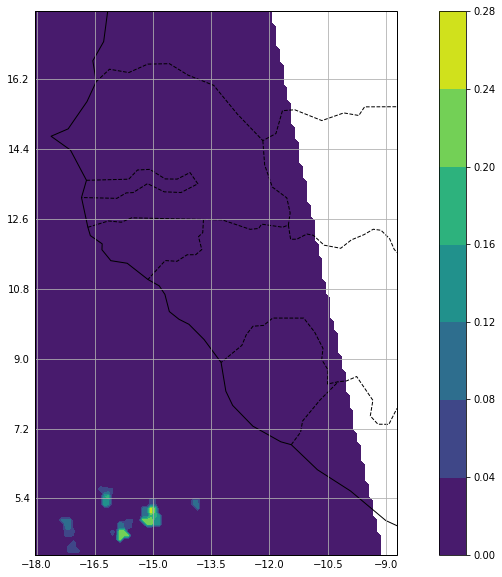

In [91]:
draw_map(da)

In [80]:
np.mean(pbox)

<xarray.DataArray 'HQprecipitation' ()>
array(0.745934, dtype=float32)
Coordinates:
    time     datetime64[ns] 2007-11-18T18:00:00

In [81]:
mfiles = glob.glob(mcs_folder + str(2007)+'-'+str(11).zfill(2)+'-18'+'*.nc')

In [82]:
mfiles

['/home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2007-11-18_20:00:00_9.nc',
 '/home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2007-11-18_18:00:00_12.nc',
 '/home/ck/DIR/cornkle/MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM/2007-11-18_18:00:00_36.nc']

0.0
0.3962201678724853
0.1692552246186309


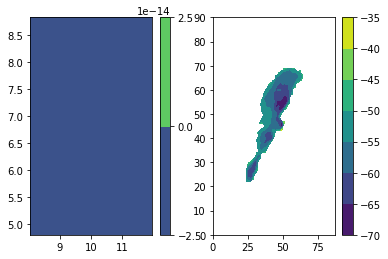

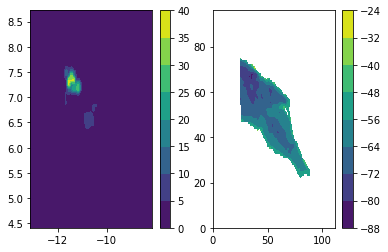

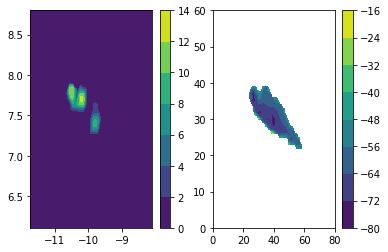

In [83]:
tot = 0
for m in mfiles:
    da = xr.open_dataset(m)
    tmask = np.isnan(da['tc_lag0'].values) | np.isnan(da['p'].values)
    
    (da['p'].values)[tmask] = 0

    f = plt.figure()
    ax = f.add_subplot(121)
    plt.contourf(da['lon'],da['lat'], da['p'])
    plt.colorbar()
    ax = f.add_subplot(122)
    plt.contourf(da['tc_lag0'])
    plt.colorbar()
    ptot = np.nanmean(da['p'])
    print(ptot)
    tot += ptot

In [84]:
tot

0.5654753924911162